# Propagating error in 2 very generic ways using Monte Carlo Methods
- The functions show in these notebooks were developed for PySulfSat. However, they can be used for any application - there is no requirement for the columns to have certain names. They work equally well for 'Al2O3_Liq' as 'Height_of_dog'
- In this example, we use data from the following excel file you can download from GitHub
https://github.com/PennyWieser/PySulfSat/blob/main/docs/Examples/Monte_Carlo_Simulations/Noise_example.xlsx

## First, import required packages

In [1]:
import numpy as np
import pandas as pd
import PySulfSat as ss
import matplotlib.pyplot as plt

## Option 1 - Load in two dataframes
- The easiest way to do Monte Carlo simulations is to have two dataframes. The first dataframe has the preferred values for each column (df1)
- The second dataframe (df2) has the errors for each column in df1. This function only works if you have exactly the same columns in df1 and df2, where the columns in df2 have the suffix '_Err' after them. This requirement saves confusion about what is and isn't having noise added to it

In [2]:
df1 = pd.read_excel('Noise_example.xlsx', sheet_name='var')
df1.head()

,Sample_ID,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar,T_K
0,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,0,0,5.12,0.2,0,0,0,1.0000,1293.15
1,Feig2010_2,53.642629,0.617371,19.320971,4.884986,0,3.257343,6.824314,5.057043,0,0,0,5.18,0.2,0,0,0,1.0230,1253.15
2,Feig2010_3,49.629083,0.365787,19.103075,5.302860,0,6.403377,11.615943,3.275783,0,0,0,5.05,0.2,0,0,0,1.0170,1333.15
3,Feig2010_4,51.624314,0.443871,18.451100,6.303071,0,6.132229,10.365057,3.685714,0,0,0,2.67,0.2,0,0,0,0.9945,1373.15
4,Feig2010_5,53.980586,0.817471,17.454986,6.744429,0,5.149100,9.030871,4.179543,0,0,0,2.25,0.2,0,0,0,0.9945,1373.15


- df2 can either be absolute errors, or percentage errors, here we show how to do both

In [3]:
df2a= pd.read_excel('Noise_example.xlsx', sheet_name='err_Abs')
df2a.head()

,Sample_ID,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,Cr2O3_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3Fet_Liq_Err,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar_Err,T_K_Err
0,Feig2010_1,0.326030,0.042448,0.221884,0.432684,0,0.207011,0.268045,0.213647,0,0,0,0.2560,0.02,0,0,0,0.1,50
1,Feig2010_2,0.328698,0.025182,0.242675,0.214755,0,0.163292,0.171717,0.085388,0,0,0,0.2590,0.02,0,0,0,0.1,50
2,Feig2010_3,0.476011,0.027083,0.235814,0.301696,0,0.174436,0.206030,0.229583,0,0,0,0.2525,0.02,0,0,0,0.1,50
3,Feig2010_4,0.442894,0.047517,0.234808,0.219780,0,0.171799,0.274484,0.259757,0,0,0,0.1335,0.02,0,0,0,0.1,50
4,Feig2010_5,0.445356,0.043963,0.316155,0.389311,0,0.134659,0.209045,0.453723,0,0,0,0.1125,0.02,0,0,0,0.1,50


In [4]:
df2b=pd.read_excel('Noise_example.xlsx', sheet_name='err_Perc')
df2b

,Sample_ID,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,Cr2O3_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3Fet_Liq_Err,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar_Err,T_K_Err
0,Feig2010_1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,Feig2010_2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,Feig2010_3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,Feig2010_4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,Feig2010_5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5,Feig2010_6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
6,Feig2010_7,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


### Now we mix these dataframes
- This function takes df1, and duplicates each row 500 times. For each column, it adds noise based on the absolute error values in df2a, normally distributed in this case

In [5]:
df_noisy_abs=ss.add_noise_2_dataframes(df_values=df1, df_err=df2a, 
        error_type="Abs", error_dist="normal", N_dups=500)
df_noisy_abs.head()

Yay. columns match in 2 dataframes


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar,T_K,Sample_ID
0,50.913758,0.511307,19.274958,5.212202,0.0,4.425408,9.097664,4.243327,0.0,0.0,0.0,4.972882,0.182444,0.0,0.0,0.0,0.893419,1450.334804,Feig2010_1
1,51.783795,0.490466,19.478724,5.966879,0.0,4.647235,9.268602,4.638451,0.0,0.0,0.0,5.001553,0.205807,0.0,0.0,0.0,1.060893,1305.389325,Feig2010_1
2,50.946566,0.495336,19.441521,4.709942,0.0,4.239923,9.038507,4.422835,0.0,0.0,0.0,4.644969,0.219550,0.0,0.0,0.0,1.019487,1325.993227,Feig2010_1
3,51.591152,0.513472,19.057271,5.638635,0.0,4.365009,9.539107,4.307517,0.0,0.0,0.0,5.443208,0.205386,0.0,0.0,0.0,0.969468,1267.668917,Feig2010_1
4,51.213261,0.465460,19.441407,5.291514,0.0,4.261650,9.121522,4.470449,0.0,0.0,0.0,5.217258,0.181812,0.0,0.0,0.0,0.988363,1252.952341,Feig2010_1


- If we use the % errors instead, we just have to say that they are % errors (error_type='Perc')

In [6]:
df_noisy_perc=ss.add_noise_2_dataframes(df_values=df1, df_err=df2b, 
        error_type="Perc", error_dist="normal", N_dups=100)
df_noisy_perc.head()

Yay. columns match in 2 dataframes


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar,T_K,Sample_ID
0,54.087327,0.475916,18.345069,4.928121,0.0,4.592596,9.308700,3.963908,0.0,0.0,0.0,4.835036,0.212479,0.0,0.0,0.0,1.014445,1352.713805,Feig2010_1
1,48.305405,0.525999,20.271589,5.066799,0.0,4.491055,8.562946,3.730101,0.0,0.0,0.0,5.473964,0.173648,0.0,0.0,0.0,1.116074,1336.802718,Feig2010_1
2,49.062298,0.521121,21.593122,5.029600,0.0,4.266419,8.776695,4.403808,0.0,0.0,0.0,4.884332,0.202283,0.0,0.0,0.0,1.073905,1376.814028,Feig2010_1
3,47.358335,0.484893,18.852941,5.194714,0.0,4.618413,8.985907,4.358929,0.0,0.0,0.0,5.522085,0.190266,0.0,0.0,0.0,0.931209,1181.133378,Feig2010_1
4,46.752519,0.484632,19.586234,5.078181,0.0,4.174629,9.700458,4.200720,0.0,0.0,0.0,5.244453,0.194793,0.0,0.0,0.0,1.049739,1388.679666,Feig2010_1


### Lets inspect the outputs to convince ourselves this has done the right thing!

Text(0, 0.5, '# of simulations')

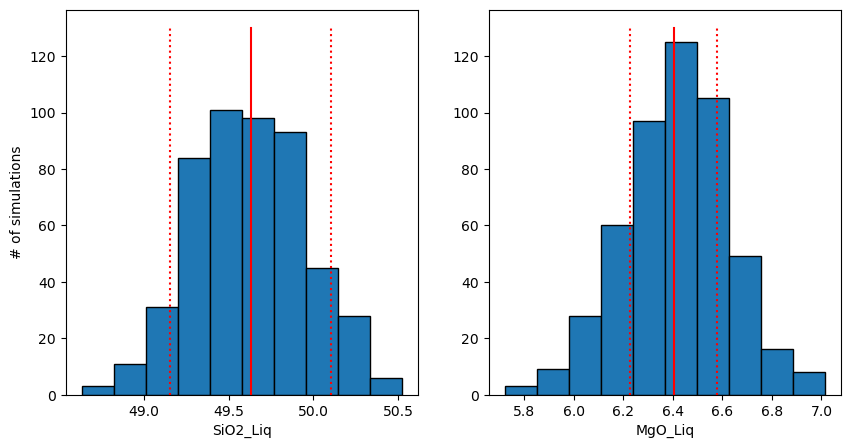

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# Pick a smaple to look at all the duplicates for
sam='Feig2010_3'
# Pick a variable from your df1
var1='SiO2_Liq'
var1_err=var1+'_Err'
ax1.hist(df_noisy_abs[var1].loc[df_noisy_abs['Sample_ID']==sam], ec='k')
ax1.plot([df1[var1].loc[df1['Sample_ID']==sam], df1[var1].loc[df1['Sample_ID']==sam]],
         [0, 130], '-r')
ax1.plot([df2a[var1_err].loc[df2a['Sample_ID']==sam]+df1[var1].loc[df1['Sample_ID']==sam], 
          df2a[var1_err].loc[df2a['Sample_ID']==sam]+df1[var1].loc[df1['Sample_ID']==sam]],
         [0, 130], ':r')
ax1.plot([-df2a[var1_err].loc[df2a['Sample_ID']==sam]+df1[var1].loc[df1['Sample_ID']==sam], 
          -df2a[var1_err].loc[df2a['Sample_ID']==sam]+df1[var1].loc[df1['Sample_ID']==sam]],
         [0, 130], ':r')
ax1.set_xlabel(var1)
var2='MgO_Liq'
var2_err=var2+'_Err'
ax2.hist(df_noisy_abs[var2].loc[df_noisy_abs['Sample_ID']==sam], ec='k')
ax2.plot([df1[var2].loc[df1['Sample_ID']==sam], df1[var2].loc[df1['Sample_ID']==sam]],
         [0, 130], '-r')
ax2.plot([df2a[var2_err].loc[df2a['Sample_ID']==sam]+df1[var2].loc[df1['Sample_ID']==sam], 
          df2a[var2_err].loc[df2a['Sample_ID']==sam]+df1[var2].loc[df1['Sample_ID']==sam]],
         [0, 130], ':r')
ax2.plot([-df2a[var2_err].loc[df2a['Sample_ID']==sam]+df1[var2].loc[df1['Sample_ID']==sam], 
          -df2a[var2_err].loc[df2a['Sample_ID']==sam]+df1[var2].loc[df1['Sample_ID']==sam]],
         [0, 130], ':r')
ax2.set_xlabel(var2)
ax1.set_ylabel('# of simulations')

### Lets now propagate error using the ONeill s6+ method
- ONeill and Mavrogenes (2022) point out that Cs6 is very sensitive to input oxide variations
- Here lets use the perc error example, where just for simplicity, we assume every input has a 5% error

In [8]:
noisy_ONeill_S6St=ss.calculate_OM2022_S6St(df=df_noisy_abs, Fe3Fet_Liq=df_noisy_abs['Fe3Fet_Liq'],
                                          T_K=df_noisy_abs['T_K'])
noisy_ONeill_S6St.head()

,S6St_Liq,LnCS2_calc,LnCS6_calc,LnKSO2S2,LnS6S2,deltaQFM_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,...,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,logfo2_calc,Fe2_Liq_cat_frac
0,0.749971,-3.860423,13.153619,-18.197454,1.098460,1.286109,50.913758,0.511307,19.274958,5.212202,...,0.094687,0.220668,0.079918,0.0,0.003736,0.0,0.602142,0.649270,-7.407552,0.034617
1,0.797597,-5.164300,15.686893,-22.411567,1.371344,1.515277,51.783795,0.490466,19.478724,5.966879,...,0.093730,0.216675,0.084881,0.0,0.003482,0.0,0.581293,0.636108,-9.096605,0.037404
2,0.908965,-5.218922,15.157873,-21.755895,2.301061,1.664308,50.946566,0.495336,19.441521,4.709942,...,0.094250,0.222997,0.083456,0.0,0.003626,0.0,0.616071,0.672781,-8.649328,0.029918
3,0.743656,-5.673550,16.282182,-23.667598,1.065060,1.507313,51.591152,0.513472,19.057271,5.638635,...,0.098056,0.215483,0.080125,0.0,0.003705,0.0,0.579815,0.634579,-9.675705,0.035949
4,0.472859,-5.939916,16.568924,-24.178304,-0.108670,1.253591,51.213261,0.465460,19.441407,5.291514,...,0.094250,0.220965,0.083587,0.0,0.003376,0.0,0.589425,0.636973,-10.161582,0.034916


- Now we want to average for every sample, this function you tell it what column you want to average 'calc', and what you want to average by 'Sample_ID'. For each sample, this gives you the mean, median, std dev, min and max

In [9]:
Stats_S6=ss.av_noise_samples_series(calc=noisy_ONeill_S6St['S6St_Liq'], sampleID=noisy_ONeill_S6St['Sample_ID'])
Stats_S6

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,Feig2010_1,500,0.708075,0.747490,0.183174,0.981044,0.102068
1,Feig2010_2,500,0.733934,0.779765,0.178797,0.990495,0.063617
2,Feig2010_3,500,0.713095,0.760753,0.187637,0.969171,0.049824
3,Feig2010_4,500,0.776815,0.817811,0.157249,0.977524,0.084436
4,Feig2010_5,500,0.775401,0.819657,0.173354,0.987939,0.095915
5,Feig2010_6,500,0.776293,0.825845,0.170244,0.987217,0.105974
6,Feig2010_7,500,0.827576,0.874397,0.144561,0.988606,0.233095


## Option 2 - Alter one dataframe on a by-column basis
- This options is better for when you only want to propagate errors on individual parameters
- The first step is to take your dataframe, and duplicate each row N times. This provies you the option to create rows with errors for some parameters and not for others

In [10]:
# Here we duplicate each row in df1 5000 times
N_dups=5000
Dupdf=ss.duplicate_dataframe(df=df1, N_dup=N_dups)
Dupdf.head()

,Sample_ID,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar,T_K
0,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,0,0,5.12,0.2,0,0,0,1.0,1293.15
1,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,0,0,5.12,0.2,0,0,0,1.0,1293.15
2,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,0,0,5.12,0.2,0,0,0,1.0,1293.15
3,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,0,0,5.12,0.2,0,0,0,1.0,1293.15
4,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,0,0,5.12,0.2,0,0,0,1.0,1293.15


- The next step is to decide what parameters you want to add error to
- First, we are going to calculate temperatures using Thermobar

In [11]:
import Thermobar as pt
T_K_Eq22_Put=pt.calculate_liq_only_temp(liq_comps=df1, equationT='T_Put2008_eq22_BeattDMg', P=5)

In [12]:
T_K_Eq22_Put

0    1316.236659
1    1287.949163
2    1354.169430
3    1394.872188
4    1383.379881
5    1436.555874
6    1445.628402
dtype: float64

- Now, lets say we believe this is associated with +-30 K of uncertainty, we use the function 

In [13]:
Temp_Err=ss.add_noise_series(T_K_Eq22_Put, error_var=30,
error_type="Abs", error_dist="normal", N_dup=N_dups)
# Then add this new column to the dataframe
Dupdf['T_K_MC']=Temp_Err
Dupdf.head()

,Sample_ID,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar,T_K,T_K_MC
0,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,0,0,5.12,0.2,0,0,0,1.0,1293.15,1303.971853
1,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,0,0,5.12,0.2,0,0,0,1.0,1293.15,1300.001612
2,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,0,0,5.12,0.2,0,0,0,1.0,1293.15,1289.662793
3,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,0,0,5.12,0.2,0,0,0,1.0,1293.15,1303.193527
4,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,0,0,5.12,0.2,0,0,0,1.0,1293.15,1271.989780


- Now perform whatever calculation you want to propagate temperature in 
- Here, we calculate the SCSS according to Smythe et al. 2017

In [14]:
SCSS_MC_S2017=ss.calculate_S2017_SCSS(df=Dupdf, T_K=Dupdf['T_K_MC'], Fe_FeNiCu_Sulf=0.65, P_kbar=5)
SCSS_MC_S2017.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
no non ideal SCSS as no Cu/CuFeNiCu


,SCSS2_ppm_ideal_Smythe2017,SCSS2_ppm_ideal_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,...,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar,T_K,T_K_MC,Fe_FeNiCu_Sulf_calc
0,497.450605,135.888470,1303.971853,5,0.65,None,0.370857,0.002677,0.165912,0.04893,...,0,5.12,0.2,0,0,0,1.0,1293.15,1303.971853,0.65
1,490.253478,133.922432,1300.001612,5,0.65,None,0.370857,0.002677,0.165912,0.04893,...,0,5.12,0.2,0,0,0,1.0,1293.15,1300.001612,0.65
2,471.819009,128.886692,1289.662793,5,0.65,None,0.370857,0.002677,0.165912,0.04893,...,0,5.12,0.2,0,0,0,1.0,1293.15,1289.662793,0.65
3,496.034504,135.501634,1303.193527,5,0.65,None,0.370857,0.002677,0.165912,0.04893,...,0,5.12,0.2,0,0,0,1.0,1293.15,1303.193527,0.65
4,441.329167,120.557789,1271.989780,5,0.65,None,0.370857,0.002677,0.165912,0.04893,...,0,5.12,0.2,0,0,0,1.0,1293.15,1271.989780,0.65


In [15]:
len(SCSS_MC_S2017)

35000

-  Now, we want to average each row as before to look at what the 1 sigma is for the calculated SCSS ideal

In [16]:
Stats_SCSS=ss.av_noise_samples_series(calc=SCSS_MC_S2017['SCSS2_ppm_ideal_Smythe2017'], 
                                      sampleID=SCSS_MC_S2017['Sample_ID'])
Stats_SCSS

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,Feig2010_1,5000,522.440177,520.333008,56.538207,734.626806,355.113796
1,Feig2010_2,5000,382.053114,380.359694,45.697467,553.702300,235.494106
2,Feig2010_3,5000,740.765339,737.876083,72.978115,1053.928742,487.277615
3,Feig2010_4,5000,609.358404,607.522346,56.938345,832.370947,437.509850
4,Feig2010_5,5000,490.780387,489.927245,47.204902,680.710180,326.880793
5,Feig2010_6,5000,703.976167,701.896257,61.519507,923.874808,495.972500
6,Feig2010_7,5000,714.165084,712.967607,66.704645,961.441376,493.948282


- We can do this for more than 1 variable. 
- Lets say we believe the uncertainty in the sulfide composition is +0.05
- Because currently our sulfide composition was just a single value, lets first make it a panda series with the same length as the rest of the dataframe

In [17]:
sulf_comp_ps=pd.Series([0.65]*len(df1))

In [18]:
Sulf_Comp_Err=ss.add_noise_series(sulf_comp_ps, error_var=0.05,
error_type="Abs", error_dist="normal", N_dup=N_dups)
# Then add this new column to the dataframe
Dupdf['Sulf_MC']=Sulf_Comp_Err

In [19]:
Dupdf

,Sample_ID,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,...,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar,T_K,T_K_MC,Sulf_MC
0,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,...,0,5.12,0.2,0,0,0,1.0,1293.15,1303.971853,0.676357
1,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,...,0,5.12,0.2,0,0,0,1.0,1293.15,1300.001612,0.561254
2,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,...,0,5.12,0.2,0,0,0,1.0,1293.15,1289.662793,0.703938
3,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,...,0,5.12,0.2,0,0,0,1.0,1293.15,1303.193527,0.558779
4,Feig2010_1,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,...,0,5.12,0.2,0,0,0,1.0,1293.15,1271.989780,0.611912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,Feig2010_7,53.42628,0.50142,18.53454,4.57446,0,7.38606,11.28198,3.6731,0,...,0,0.98,0.2,0,0,0,1.0085,1413.15,1441.239056,0.703877
34996,Feig2010_7,53.42628,0.50142,18.53454,4.57446,0,7.38606,11.28198,3.6731,0,...,0,0.98,0.2,0,0,0,1.0085,1413.15,1423.538909,0.718836
34997,Feig2010_7,53.42628,0.50142,18.53454,4.57446,0,7.38606,11.28198,3.6731,0,...,0,0.98,0.2,0,0,0,1.0085,1413.15,1522.760870,0.706290
34998,Feig2010_7,53.42628,0.50142,18.53454,4.57446,0,7.38606,11.28198,3.6731,0,...,0,0.98,0.2,0,0,0,1.0085,1413.15,1463.942113,0.533844


In [20]:
Dupdf['T_K'].unique()

array([1293.15, 1253.15, 1333.15, 1373.15, 1413.15], dtype=object)

In [21]:
SCSS_MC_T_Sulf_S2017=ss.calculate_S2017_SCSS(df=Dupdf, T_K=Dupdf['T_K_MC'], Fe_FeNiCu_Sulf=Dupdf['Sulf_MC'], P_kbar=5)
SCSS_MC_T_Sulf_S2017.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
no non ideal SCSS as no Cu/CuFeNiCu


,SCSS2_ppm_ideal_Smythe2017,SCSS2_ppm_ideal_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,...,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,P_kbar,T_K,T_K_MC,Sulf_MC,Fe_FeNiCu_Sulf_calc
0,517.621971,141.398678,1303.971853,5,0.676357,None,0.370857,0.002677,0.165912,0.04893,...,5.12,0.2,0,0,0,1.0,1293.15,1303.971853,0.676357,0.676357
1,423.317703,115.637602,1300.001612,5,0.561254,None,0.370857,0.002677,0.165912,0.04893,...,5.12,0.2,0,0,0,1.0,1293.15,1300.001612,0.561254,0.561254
2,510.971540,139.581981,1289.662793,5,0.703938,None,0.370857,0.002677,0.165912,0.04893,...,5.12,0.2,0,0,0,1.0,1293.15,1289.662793,0.703938,0.703938
3,426.421047,116.485342,1303.193527,5,0.558779,None,0.370857,0.002677,0.165912,0.04893,...,5.12,0.2,0,0,0,1.0,1293.15,1303.193527,0.558779,0.558779
4,415.468509,113.493439,1271.989780,5,0.611912,None,0.370857,0.002677,0.165912,0.04893,...,5.12,0.2,0,0,0,1.0,1293.15,1271.989780,0.611912,0.611912


In [22]:
Stats_SCSS_SULF=ss.av_noise_samples_series(calc=SCSS_MC_T_Sulf_S2017['SCSS2_ppm_ideal_Smythe2017'], 
                                      sampleID=SCSS_MC_T_Sulf_S2017['Sample_ID'])
Stats_SCSS_SULF

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,Feig2010_1,5000,522.470351,520.626058,69.584499,797.978000,324.357237
1,Feig2010_2,5000,381.230189,378.862699,54.090623,589.132632,235.837878
2,Feig2010_3,5000,740.400171,736.336992,92.599818,1146.336287,430.323069
3,Feig2010_4,5000,609.827736,605.595898,73.627698,910.840912,355.614099
4,Feig2010_5,5000,490.707674,488.713655,61.453301,758.577791,312.570390
5,Feig2010_6,5000,702.861023,700.116084,82.064840,1006.353350,455.183423
6,Feig2010_7,5000,714.086869,709.241052,87.821749,1074.446091,433.156983
